![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [45]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

In [46]:
women=pd.read_csv('women_results.csv')
women['total_number_goals']=women['home_score']+women['away_score']
women['gender']='women'
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_number_goals,gender
0,0,1969-11-01,Italy,France,1,0,Euro,1,women
1,1,1969-11-01,Denmark,England,4,3,Euro,7,women
2,2,1969-11-02,England,France,2,0,Euro,2,women
3,3,1969-11-02,Italy,Denmark,3,1,Euro,4,women
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship,5,women


In [47]:
men=pd.read_csv('men_results.csv')
men['total_number_goals']=men['home_score']+men['away_score']
men['gender']='men'
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_number_goals,gender
0,0,1872-11-30,Scotland,England,0,0,Friendly,0,men
1,1,1873-03-08,England,Scotland,4,2,Friendly,6,men
2,2,1874-03-07,Scotland,England,2,1,Friendly,3,men
3,3,1875-03-06,England,Scotland,2,2,Friendly,4,men
4,4,1876-03-04,Scotland,England,3,0,Friendly,3,men


In [48]:
print(women['tournament'].unique())
print(men['tournament'].unique())

['Euro' 'AFC Championship' 'UEFA Euro qualification' 'OFC Championship'
 'UEFA Euro' 'African Championship' 'CONCACAF Championship' 'Copa América'
 'FIFA World Cup' 'CONCACAF Invitational Tournament' 'Algarve Cup'
 'Olympic Games' 'Four Nations Tournament'
 'African Championship qualification' 'CONCACAF Gold Cup qualification'
 'CONCACAF Gold Cup' 'AFC Asian Cup qualification' 'AFC Asian Cup'
 'Cyprus Cup' 'Olympic Games qualification' 'Friendly' 'SheBelieves Cup'
 'FIFA World Cup qualification' 'Tournament of Nations'
 'OFC Nations Cup qualification' 'African Cup of Nations'
 'OFC Nations Cup' 'Tournoi de France' "Basque Country Women's Cup"
 'African Cup of Nations qualification']
['Friendly' 'British Home Championship' 'Évence Coppée Trophy'
 'Copa Lipton' 'Copa Newton' 'Copa Premio Honor Argentino'
 'Copa Premio Honor Uruguayo' 'Copa Roca' 'Copa América'
 'Copa Chevallier Boutell' 'Nordic Championship'
 'Central European International Cup' 'Baltic Cup' 'Balkan Cup'
 'FIFA World Cup

In [49]:
women_world_cup=women[np.logical_and(women['tournament'] =='FIFA World Cup', women['date'] >='2002-01-01')]
women_world_cup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_number_goals,gender
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women


In [50]:
men_world_cup=men[np.logical_and(men['tournament'] =='FIFA World Cup', men['date'] >='2002-01-01')]
men_world_cup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_number_goals,gender
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


In [51]:
world_cup = pd.concat([men_world_cup, women_world_cup], axis=0, ignore_index=True)

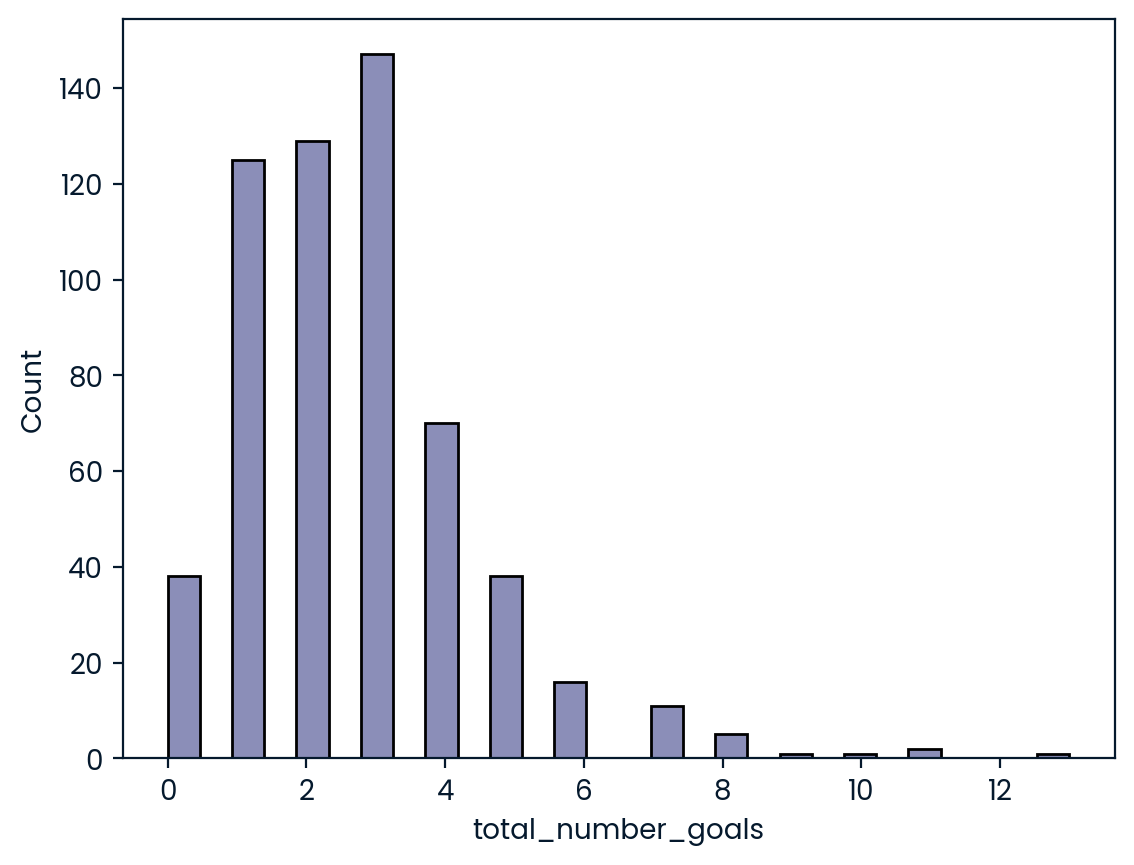

In [52]:
sns.histplot(data=world_cup, x="total_number_goals")
plt.show()

In [53]:
world_cup=world_cup[['gender','total_number_goals']]
world_cup_pivot_table=world_cup.pivot(columns="gender", values="total_number_goals")
world_cup_pivot_table

gender,men,women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN
...,...,...
579,NaN,3.0
580,NaN,3.0
581,NaN,1.0
582,NaN,3.0


In [54]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_test = pingouin.mwu(x=world_cup_pivot_table["women"],
                          y=world_cup_pivot_table["men"],
                          alternative="greater")

In [55]:
# Extract p-value and determine hypothesis test result
p_val = results_test["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}